In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
df=pd.read_json('transactions.txt',lines=True)

In [3]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

### Only some columns considered as features

In [5]:
use_cols=['creditLimit','availableMoney','transactionAmount','acqCountry','currentBalance','cardPresent','expirationDateKeyInMatch']

In [6]:
df_new=df[use_cols]

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               786363 non-null  int64  
 1   availableMoney            786363 non-null  float64
 2   transactionAmount         786363 non-null  float64
 3   acqCountry                786363 non-null  object 
 4   currentBalance            786363 non-null  float64
 5   cardPresent               786363 non-null  bool   
 6   expirationDateKeyInMatch  786363 non-null  bool   
dtypes: bool(2), float64(3), int64(1), object(1)
memory usage: 31.5+ MB


## There one object type feature and two boolen type features. Need to be transformed

### Transform boolen features as 1 and 0, reflecting to True and False respectively

In [8]:
df_new['cardPresent']=df_new['cardPresent'].apply(lambda x:1 if x==True else 0)
df_new['expirationDateKeyInMatch']=df_new['expirationDateKeyInMatch'].apply(lambda x:1 if x==True else 0)

<ipython-input-8-810ff291b266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cardPresent']=df_new['cardPresent'].apply(lambda x:1 if x==True else 0)
<ipython-input-8-810ff291b266>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['expirationDateKeyInMatch']=df_new['expirationDateKeyInMatch'].apply(lambda x:1 if x==True else 0)


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               786363 non-null  int64  
 1   availableMoney            786363 non-null  float64
 2   transactionAmount         786363 non-null  float64
 3   acqCountry                786363 non-null  object 
 4   currentBalance            786363 non-null  float64
 5   cardPresent               786363 non-null  int64  
 6   expirationDateKeyInMatch  786363 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 42.0+ MB


### Transform object column as numeric using OneHotEncoder

In [10]:
df_new['acqCountry'].unique()

array(['US', '', 'CAN', 'MEX', 'PR'], dtype=object)

### A null value here, turn it to be "Unknown"

In [11]:
df_new['acqCountry']=df_new['acqCountry'].apply(lambda x:'UNKNOWN' if len(x)==0 else x)

<ipython-input-11-74d12a03ba5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['acqCountry']=df_new['acqCountry'].apply(lambda x:'UNKNOWN' if len(x)==0 else x)


In [12]:
df_new['acqCountry'].unique()

array(['US', 'UNKNOWN', 'CAN', 'MEX', 'PR'], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
ohe_cols=pd.DataFrame(ohe.fit_transform(np.array(df_new['acqCountry']).reshape(-1,1)))

In [14]:
ohe_cols.columns=sorted(list(df_new['acqCountry'].unique()))

In [15]:
ohe_cols

,CAN,MEX,PR,UNKNOWN,US
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
786358,0.0,0.0,0.0,0.0,1.0
786359,0.0,0.0,0.0,0.0,1.0
786360,0.0,0.0,0.0,0.0,1.0
786361,0.0,0.0,0.0,0.0,1.0


### Drop the object column and concat the new numeric columns

In [16]:
df_new.drop('acqCountry',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df_new=pd.concat([df_new,ohe_cols],axis=1)

In [18]:
df_new=pd.concat([df_new,df['isFraud']],axis=1)

In [19]:
df_new['isFraud']=df_new['isFraud'].apply(lambda x:1 if x==True else 0)

In [20]:
df_new.corr()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,CAN,MEX,PR,UNKNOWN,US,isFraud
creditLimit,1.000000,0.834977,0.005581,0.653652,-0.003929,0.002391,0.000341,-0.001773,-0.001038,0.000548,0.000803,0.003108
availableMoney,0.834977,1.000000,-0.010070,0.129332,0.002508,0.004067,0.000955,-0.002024,-0.001865,0.000483,0.000995,-0.001538
transactionAmount,0.005581,-0.010070,1.000000,0.023905,0.037361,0.001751,0.000324,0.000378,-0.000654,0.000565,-0.000462,0.075651
currentBalance,0.653652,0.129332,0.023905,1.000000,-0.010529,-0.001285,-0.000699,-0.000411,0.000695,0.000323,0.000077,0.007715
cardPresent,-0.003929,0.002508,0.037361,-0.010529,1.000000,0.040393,-0.002248,-0.002864,-0.000298,-0.000206,0.002762,-0.043418
expirationDateKeyInMatch,0.002391,0.004067,0.001751,-0.001285,0.040393,1.000000,-0.000766,-0.001194,-0.000822,0.002737,-0.000446,-0.000972
CAN,0.000341,0.000955,0.000324,-0.000699,-0.002248,-0.000766,1.000000,-0.003515,-0.002462,-0.004248,-0.453374,0.003077
MEX,-0.001773,-0.002024,0.000378,-0.000411,-0.002864,-0.001194,-0.003515,1.000000,-0.002798,-0.004829,-0.515417,0.002361
PR,-0.001038,-0.001865,-0.000654,0.000695,-0.000298,-0.000822,-0.002462,-0.002798,1.000000,-0.003382,-0.360930,0.000627
UNKNOWN,0.000548,0.000483,0.000565,0.000323,-0.000206,0.002737,-0.004248,-0.004829,-0.003382,1.000000,-0.622818,0.010338


Text(0.5, 1.0, 'Correlation Matric for related features')

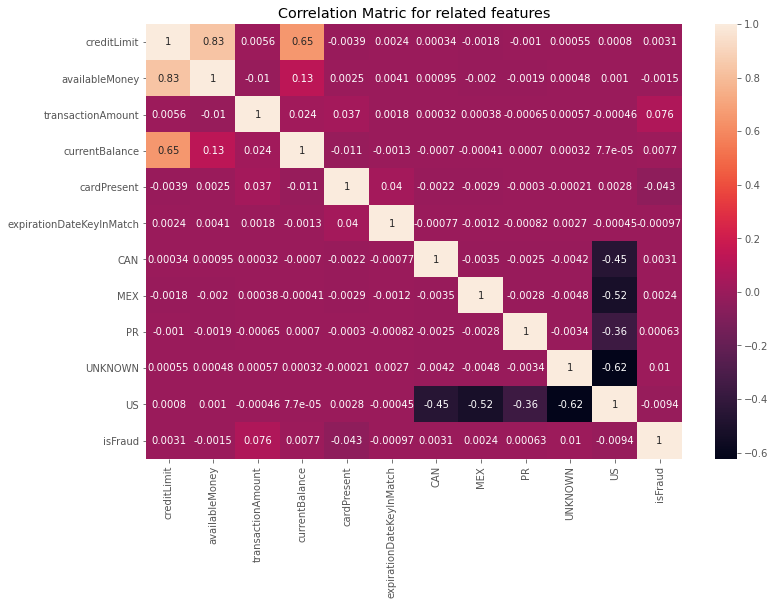

In [21]:
sns.heatmap(df_new.corr(),annot=True)
plt.title('Correlation Matric for related features')

### The heatmap shows there is no outstanding correlationship to the metric. So use them all.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
X=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [24]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
lr=LogisticRegression(random_state=0)

In [26]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred=lr.predict(X_test)

In [30]:
acc=accuracy_score(y_test,y_pred)

In [31]:
print('The accuracy of this model is: {:.2f}%'.format(acc*100))

The accuracy of this model is: 98.44%


### It shows this model is excellent.